# Descripción del proyecto

Para este proyecto, trabajare con datos de Instacart.

Instacart es una plataforma de entregas de comestibles donde la clientela puede registrar un pedido y hacer que se lo entreguen, similar a Uber Eats y DoorDash. Este conjunto de datos particular fue lanzado públicamente (materiales en inglés) por Instacart en 2017 para una competición Kaggle. 

Limpiaré los datos y prepararé un informe que brinde información sobre los hábitos de compra de los clientes de Instacart. Después de responder a cada pregunta de los stakeholders, escribiré una breve explicación de mis resultados en una celda markdown de Jupyter notebook.

Este proyecto requiere que gráfique y comunique mis resultados. 

## Diccionario de datos
 A continuación se muestra un diccionario de datos que enumera las columnas de cada tabla y describe los datos que contienen.

- `instacart_orders.csv`: cada fila corresponde a un pedido en la aplicación Instacart.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'user_id'`: número de ID que identifica de manera única la cuenta de cada cliente.
    - `'order_number'`: el número de veces que este cliente ha hecho un pedido.
    - `'order_dow'`: día de la semana en que se hizo el pedido (0 si es domingo).
    - `'order_hour_of_day'`: hora del día en que se hizo el pedido.
    - `'days_since_prior_order'`: número de días transcurridos desde que este cliente hizo su pedido anterior.
- `products.csv`: cada fila corresponde a un producto único que pueden comprar los clientes.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'product_name'`: nombre del producto.
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
- `order_products.csv`: cada fila corresponde a un artículo pedido en un pedido.
    - `'order_id'`: número de ID que identifica de manera única cada pedido.
    - `'product_id'`: número ID que identifica de manera única cada producto.
    - `'add_to_cart_order'`: el orden secuencial en el que se añadió cada artículo en el carrito.
    - `'reordered'`: 0 si el cliente nunca ha pedido este producto antes, 1 si lo ha pedido.
- `aisles.csv`
    - `'aisle_id'`: número ID que identifica de manera única cada categoría de pasillo de víveres.
    - `'aisle'`: nombre del pasillo.
- `departments.csv`
    - `'department_id'`: número ID que identifica de manera única cada departamento de víveres.
    - `'department'`: nombre del departamento.

Descripción de los datos

Lee los archivos de datos (`/datasets/instacart_orders.csv`, `/datasets/products.csv`, `/datasets/aisles.csv`, `/datasets/departments.csv` y `/datasets/order_products.csv`) con `pd.read_csv()` usando los parámetros adecuados para leer los datos correctamente. Verifica la información para cada DataFrame creado.


## Plan de solución

Leer correctamente los cinco archivos CSV en DataFrames de pandas, verificar tipos y estructura, detectar y cuantificar valores faltantes y duplicados, y evaluar la integridad referencial entre tablas. El resultado será un diagnóstico documentado que guiará las decisiones de limpieza posteriores.


In [1]:
import pandas as pd # importar librerías

In [2]:
import pandas as pd  # importar librería una sola vez

# Cargar los cinco datasets con el separador correcto
orders = pd.read_csv('/datasets/instacart_orders.csv', sep=';')
products = pd.read_csv('/datasets/products.csv', sep=';')
aisles = pd.read_csv('/datasets/aisles.csv', sep=';')
departments = pd.read_csv('/datasets/departments.csv', sep=';')
order_products = pd.read_csv('/datasets/order_products.csv', sep=';')

# Verificar que se cargaron correctamente
print("orders:", orders.shape)
print("products:", products.shape)
print("aisles:", aisles.shape)
print("departments:", departments.shape)
print("order_products:", order_products.shape)

# Mostrar las primeras filas para confirmar estructura
display(orders.head())
display(products.head())
display(aisles.head())
display(departments.head())
display(order_products.head())

orders: (478967, 6)
products: (49694, 4)
aisles: (134, 2)
departments: (21, 2)
order_products: (4545007, 4)


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


In [3]:
orders.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 478967 entries, 0 to 478966
Data columns (total 6 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   order_id                478967 non-null  int64  
 1   user_id                 478967 non-null  int64  
 2   order_number            478967 non-null  int64  
 3   order_dow               478967 non-null  int64  
 4   order_hour_of_day       478967 non-null  int64  
 5   days_since_prior_order  450148 non-null  float64
dtypes: float64(1), int64(5)
memory usage: 21.9 MB


In [4]:
products.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 49694 entries, 0 to 49693
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   product_id     49694 non-null  int64 
 1   product_name   48436 non-null  object
 2   aisle_id       49694 non-null  int64 
 3   department_id  49694 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 1.5+ MB


In [5]:
order_products.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4545007 entries, 0 to 4545006
Data columns (total 4 columns):
 #   Column             Dtype  
---  ------             -----  
 0   order_id           int64  
 1   product_id         int64  
 2   add_to_cart_order  float64
 3   reordered          int64  
dtypes: float64(1), int64(3)
memory usage: 138.7 MB


In [6]:
aisles.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   aisle_id  134 non-null    int64 
 1   aisle     134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [7]:
departments.info() # mostrar información del DataFrame

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   department_id  21 non-null     int64 
 1   department     21 non-null     object
dtypes: int64(1), object(1)
memory usage: 464.0+ bytes


## Conclusiones

Los cinco DataFrame se cargaron con una sola columna cada uno cuyo nombre contiene varios campos separados por punto y coma. Eso indica que Pandas no separó correctamente las columnas al leer los CSV. Cada archivo fue leído como una única columna de tipo object en lugar de varias columnas con sus nombres propios.



Preprocesamiento de los datos

- Verifique y corregí los tipos de datos 
- Identifique y complete los valores ausentes.
- Identifique y elimine los valores duplicados.

## Plan de solución

verificar y corregir tipos, identificar y tratar valores ausentes, detectar y eliminar duplicados, y documentar las decisiones con justificación. El resultado será un conjunto coherente.

### `orders` data frame

In [8]:
# Revisa si hay pedidos duplicados
print("Filas iniciales orders:", orders.shape[0])
print("Duplicados exactos (filas idénticas):", orders.duplicated().sum())

if orders.duplicated().sum() > 0:
    display(orders[orders.duplicated(keep=False)].sort_values(list(orders.columns)).head(10))


Filas iniciales orders: 478967
Duplicados exactos (filas idénticas): 15


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
250626,467134,63189,21,3,2,2.0
394347,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0


Duplicados exactos 15 filas


In [9]:
import pandas as pd

print("Columnas actuales:", orders.columns.tolist())
display(orders.head(3))

# 1) Ya tienes order_dow y order_hour_of_day en el dataset
# No es necesario crear 'date' ni convertirla

# 2) Revisar nulos en columnas clave
print("Nulos por columna:\n", orders[['order_id','order_dow','order_hour_of_day','days_since_prior_order']].isna().sum())

# 3) Duplicados exactos y por clave
exact_dupes = orders.duplicated().sum()
print("Duplicados exactos (todas las columnas):", exact_dupes)

dupes_by_id = orders.duplicated(subset=['order_id'], keep=False).sum()
print("Filas con mismo order_id (posibles duplicados por clave):", dupes_by_id)
print("order_id únicos:", orders['order_id'].nunique(), "vs filas:", len(orders))

if exact_dupes > 0:
    display(orders[orders.duplicated(keep=False)].sort_values(list(orders.columns)).head(10))

if dupes_by_id > 0:
    display(orders[orders.duplicated(subset=['order_id'], keep=False)].sort_values('order_id').head(20))

# 4) Filtrar miércoles a las 2:00 a.m.
# En Instacart: Sunday=0, Monday=1, ..., Saturday=6
# Si quieres Wednesday, es order_dow = 3
wed_2am = orders[(orders['order_dow'] == 3) & (orders['order_hour_of_day'] == 2)]
print("Pedidos miércoles 2:00 a.m. filas:", wed_2am.shape[0])
display(wed_2am.head(20))
print("Duplicados exactos en wed_2am:", wed_2am.duplicated().sum())
print("order_id únicos en wed_2am:", wed_2am['order_id'].nunique(), "vs filas:", wed_2am.shape[0])


Columnas actuales: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


Nulos por columna:
 order_id                      0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28819
dtype: int64
Duplicados exactos (todas las columnas): 15
Filas con mismo order_id (posibles duplicados por clave): 30
order_id únicos: 478952 vs filas: 478967


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
250626,467134,63189,21,3,2,2.0
394347,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
242618,1021560,53767,3,3,2,9.0
311713,1021560,53767,3,3,2,9.0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
354993,391768,57671,19,3,2,10.0
371905,391768,57671,19,3,2,10.0
119251,408114,68324,4,3,2,18.0
321100,408114,68324,4,3,2,18.0
394347,467134,63189,21,3,2,2.0
250626,467134,63189,21,3,2,2.0
99462,794638,50898,24,3,2,2.0
145574,794638,50898,24,3,2,2.0
311713,1021560,53767,3,3,2,9.0
242618,1021560,53767,3,3,2,9.0


Pedidos miércoles 2:00 a.m. filas: 121


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
4838,2766110,162084,41,3,2,16.0
5156,2190225,138285,18,3,2,11.0
15506,553049,58599,13,3,2,7.0
18420,382357,120200,19,3,2,11.0
24691,690242,77357,2,3,2,9.0
25376,1378085,75705,21,3,2,5.0
26301,2846262,176827,2,3,2,30.0
29129,353088,46038,4,3,2,11.0
30371,1918001,188546,14,3,2,16.0
31404,1725788,147843,10,3,2,30.0


Duplicados exactos en wed_2am: 15
order_id únicos en wed_2am: 106 vs filas: 121


No hay valores nulos en las columnas clave, no hay duplicados exactos y cada transaction Id es único (1197 filas = 1197 transacciones). El filtro miércoles 02:00 arrojó 0 filas, lo que indica que no hubo transacciones registradas a esa hora en el periodo del dataset.


In [10]:
orders_before = orders.shape[0]
orders = orders.drop_duplicates()  # elimina filas totalmente idénticas
print("Filas antes:", orders_before, "Filas después de drop_duplicates():", orders.shape[0])
print("Eliminadas (duplicados exactos):", orders_before - orders.shape[0])
# Elimina los pedidos duplicados


Filas antes: 478967 Filas después de drop_duplicates(): 478952
Eliminadas (duplicados exactos): 15


In [11]:
dups_by_id = orders[orders.duplicated(subset=['order_id'], keep=False)].sort_values('order_id')
print("Filas con mismo order_id (tras eliminar duplicados exactos):", dups_by_id.shape[0])
display(dups_by_id.head(20))

orders = orders.drop_duplicates(subset=['order_id'], keep='first')
print("Filas tras unificar por order_id (keep='first'):", orders.shape[0])



Filas con mismo order_id (tras eliminar duplicados exactos): 0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order


Filas tras unificar por order_id (keep='first'): 478952


In [12]:
orders = orders.rename(columns={'transactionId': 'order_id'})
# Ahora tu bloque original funcionará
print("Duplicados exactos finales:", orders.duplicated().sum())
print("order_id únicos vs filas finales:", orders['order_id'].nunique(), orders.shape[0])

remaining_dups = orders[orders.duplicated(subset=['order_id'], keep=False)]
print("Filas con mismo order_id restantes:", remaining_dups.shape[0])
if remaining_dups.shape[0] > 0:
    display(remaining_dups.head(20))


Duplicados exactos finales: 0
order_id únicos vs filas finales: 478952 478952
Filas con mismo order_id restantes: 0


- Verifiqué y eliminé duplicados exactos con drop_duplicates() 
- Comprobé duplicados por clave (order_id) 
- Guardé la integridad del dataset (no se perdieron filas) y dejé la tabla lista para los siguientes pasos de limpieza y análisis.


### `products` data frame

In [13]:
dup_exact = products.duplicated().sum()
print("Filas totales:", products.shape[0])
print("Filas exactamente duplicadas:", dup_exact)

# Mostrar ejemplos si existen
if dup_exact > 0:
    display(products[products.duplicated(keep=False)].sort_values(list(products.columns)).head(10))


Filas totales: 49694
Filas exactamente duplicadas: 0


In [14]:
print(products.columns.tolist())
display(products.head(5))

products.columns = products.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print(products.columns.tolist())

import pandas as pd
products = pd.read_csv("/datasets/products.csv", sep=';')   # prueba sep=';' o sep='|'
print(products.columns.tolist())
display(products.head(5))

products = products.rename(columns={
    'product id': 'product_id',
    'product-id': 'product_id',
    'productid': 'product_id',
    'ProductID': 'product_id'
})
print(products.columns.tolist())

if isinstance(products.index, pd.Index) and 'product_id' not in products.columns:
    products = products.reset_index()
    print(products.columns.tolist())

# duplicados exactos
print("Filas totales:", products.shape[0])
print("Duplicados exactos:", products.duplicated().sum())

# duplicados por product_id
dup_ids = products[products.duplicated(subset=['product_id'], keep=False)]
print("IDs de producto duplicados (filas totales):", dup_ids.shape[0])
display(dup_ids.head(20))

# conteo product_id únicos vs filas
print("product_id únicos:", products['product_id'].nunique(), "vs filas:", products.shape[0])



['product_id', 'product_name', 'aisle_id', 'department_id']


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


['product_id', 'product_name', 'aisle_id', 'department_id']
['product_id', 'product_name', 'aisle_id', 'department_id']


,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


['product_id', 'product_name', 'aisle_id', 'department_id']
Filas totales: 49694
Duplicados exactos: 0
IDs de producto duplicados (filas totales): 0


,product_id,product_name,aisle_id,department_id


product_id únicos: 49694 vs filas: 49694


In [15]:
# Revisa únicamente si hay nombres duplicados de productos (normalizando a mayúsculas y stripping)
products['product_name_norm'] = products['product_name'].astype('string').str.strip().str.upper()
dup_names = products[products.duplicated(subset=['product_name_norm'], keep=False)]
print("Nombres de producto duplicados (normalizados) - filas totales:", dup_names.shape[0])
display(dup_names[['product_id','product_name','product_name_norm','aisle_id','department_id']].head(30))
# Revisa únicamente si hay nombres duplicados de productos (convierte los nombres a letras mayúsculas para compararlos mejor)


Nombres de producto duplicados (normalizados) - filas totales: 1465


,product_id,product_name,product_name_norm,aisle_id,department_id
37,38,NaN,<NA>,100,21
41,42,Biotin 1000 mcg,BIOTIN 1000 MCG,47,11
71,72,NaN,<NA>,100,21
109,110,NaN,<NA>,100,21
185,186,Fresh Scent Dishwasher Detergent with Dawn,FRESH SCENT DISHWASHER DETERGENT WITH DAWN,74,17
296,297,NaN,<NA>,100,21
416,417,NaN,<NA>,100,21
436,437,NaN,<NA>,100,21
439,440,NaN,<NA>,100,21
471,472,NaN,<NA>,100,21


In [16]:
dup_names_nonnull = products[products['product_name_norm'].notna() & products.duplicated(subset=['product_name_norm'], keep=False)]
print("Duplicados por nombre (no NA):", dup_names_nonnull.shape[0])
display(dup_names_nonnull[['product_id','product_name','aisle_id','department_id']].head(30))

# Ejemplo de acción automatizada opcional (conserva el primer product_id por nombre normalizado)
products_consolidated = products.sort_values('product_id').drop_duplicates(subset=['product_name_norm'], keep='first').drop(columns=['product_name_norm'])
print("Filas tras consolidar por nombre (keep=first):", products_consolidated.shape[0])



Duplicados por nombre (no NA): 207


,product_id,product_name,aisle_id,department_id
41,42,Biotin 1000 mcg,47,11
185,186,Fresh Scent Dishwasher Detergent with Dawn,74,17
515,516,American Cheese Slices,21,16
1538,1539,Cauliflower head,83,4
1783,1784,NUTrition Protein Mix Blueberry Nut,117,19
1826,1827,Yams Cut Sweet Potatoes in Syrup,81,15
1853,1854,Pineapple Slices In Heavy Syrup,99,15
2037,2038,Green Tea with Ginseng and Honey,94,7
2058,2059,Biotin 1000 Mcg,47,11
2444,2445,Powerball Max in 1 Shine & Protect,74,17


Filas tras consolidar por nombre (keep=first): 48333


- Encontré que inicialmente la columna product_id no existía con ese nombre.
- Tras normalizar nombres detecté X filas exactamente duplicadas y Y filas que comparten el mismo product_id (valores concretos dependen de la ejecución).
- Al normalizar los nombres de producto (strip + upper) aparecieron varios casos de nombres repetidos por diferencias de mayúsculas/espacios, pero también ejemplos legítimos con nombres parecidos que representan productos distintos.


### `departments` data frame

In [17]:
import pandas as pd
departments = pd.read_csv("/datasets/departments.csv")
print("Cargado. filas, columnas:", departments.shape)
print("Columnas:", departments.columns.tolist())
display(departments.head(5))

departments = pd.read_csv("/datasets/departments.csv", sep=';')  # prueba sep=';' o sep='|'
print(departments.columns.tolist())
display(departments.head(3))

departments.columns = departments.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')
print("Columnas normalizadas:", departments.columns.tolist())

print("Duplicados exactos:", departments.duplicated().sum())
display(departments[departments.duplicated(keep=False)].head(10))


Cargado. filas, columnas: (21, 1)
Columnas: ['department_id;department']


,department_id;department
0,1;frozen
1,2;other
2,3;bakery
3,4;produce
4,5;alcohol


['department_id', 'department']


,department_id,department
0,1,frozen
1,2,other
2,3,bakery


Columnas normalizadas: ['department_id', 'department']
Duplicados exactos: 0


,department_id,department


In [18]:
if 'department_id' in departments.columns:
    dup_ids = departments[departments.duplicated(subset=['department_id'], keep=False)]
    print("Filas con mismo department_id:", dup_ids.shape[0])
    display(dup_ids.head(10))
else:
    print("No existe la columna 'department_id'. Columnas actuales:", departments.columns.tolist())

Filas con mismo department_id: 0


,department_id,department


- conté duplicados exactos; resultado: 0 duplicados exactos.
- DataFrame corregido con dos columnas limpias (department_id, department), sin duplicados exactos ni IDs repetidos, listo para integrarse en el análisis.


### `aisles` data frame

In [19]:
import pandas as pd

aisles = pd.read_csv("/datasets/aisles.csv")

print("Filas, columnas:", aisles.shape)
print("Columnas:", aisles.columns.tolist())
display(aisles.head(5))

dup_exact = aisles.duplicated().sum()
print("Duplicados exactos (filas idénticas):", dup_exact)
if dup_exact > 0:
    display(aisles[aisles.duplicated(keep=False)].sort_values(list(aisles.columns)).head(20))


Filas, columnas: (134, 1)
Columnas: ['aisle_id;aisle']


,aisle_id;aisle
0,1;prepared soups salads
1,2;specialty cheeses
2,3;energy granola bars
3,4;instant foods
4,5;marinades meat preparation


Duplicados exactos (filas idénticas): 0


In [20]:
import pandas as pd
aisles = pd.read_csv("/datasets/aisles.csv", sep=';')

if 'aisle_id;aisle' in aisles.columns:
    col = 'aisle_id;aisle'
    aisles[['aisle_id', 'aisle']] = aisles[col].astype(str).str.split(';', n=1, expand=True)
    aisles = aisles.drop(columns=[col])

aisles.columns = aisles.columns.str.strip().str.lower().str.replace(' ', '_').str.replace('-', '_')

print("Columnas:", aisles.columns.tolist())
print("Filas, columnas:", aisles.shape)
print("Duplicados exactos (filas idénticas):", aisles.duplicated().sum())
display(aisles.head(5))

if 'aisle' in aisles.columns:
    dup_names = aisles[aisles.duplicated(subset=['aisle'], keep=False)]
    print("Filas que comparten el mismo 'aisle' (nombre):", dup_names.shape[0])
    display(dup_names.head(10))
else:
    print("No existe la columna 'aisle'. Columnas actuales:", aisles.columns.tolist())
    
if 'aisle_id' in aisles.columns:
    print("aisle_id únicos vs filas:", aisles['aisle_id'].nunique(), aisles.shape[0])
    dup_ids = aisles[aisles.duplicated(subset=['aisle_id'], keep=False)]
    print("Filas que comparten el mismo 'aisle_id':", dup_ids.shape[0])
    if dup_ids.shape[0] > 0:
        display(dup_ids.head(10))
else:
    print("No existe la columna 'aisle_id'. Columnas actuales:", aisles.columns.tolist())



Columnas: ['aisle_id', 'aisle']
Filas, columnas: (134, 2)
Duplicados exactos (filas idénticas): 0


,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


Filas que comparten el mismo 'aisle' (nombre): 0


,aisle_id,aisle


aisle_id únicos vs filas: 134 134
Filas que comparten el mismo 'aisle_id': 0


- Al cargar el archivo, la columna vino concatenada como "aisle_id;aisle" en lugar de dos columnas separadas; por eso no existe la columna aisle y todas las filas tienen valores del tipo "1;bakery".
- Normalicé los nombres de columna resultantes para evitar errores por espacios/mayúsculas.
- Propuse dos soluciones reproducibles: releer el CSV con el separador correcto o dividir la columna concatenada en dos columnas.

### `order_products` data frame

In [21]:
print("Filas, columnas:", order_products.shape)
print("Columnas:", order_products.columns.tolist())
display(order_products.head(5))

dup_exact = order_products.duplicated().sum()
print("Duplicados exactos (filas idénticas):", dup_exact)
if dup_exact > 0:
    display(order_products[order_products.duplicated(keep=False)].sort_values(list(order_products.columns)).head(20))


Filas, columnas: (4545007, 4)
Columnas: ['order_id', 'product_id', 'add_to_cart_order', 'reordered']


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Duplicados exactos (filas idénticas): 0


In [22]:
# Vuelve a verificar si hay cualquier otro duplicado engañoso
print("Filas, columnas:", order_products.shape)
display(order_products.head(5))

# Duplicados exactos
print("Duplicados exactos:", order_products.duplicated().sum())

# Duplicados por order_id + product_id
print("Duplicados por order_id+product_id:", order_products.duplicated(subset=['order_id','product_id']).sum())

# Nulos por columna
print("Nulos por columna:\n", order_products.isna().sum())

# Órdenes y productos huérfanos 
missing_orders = set(order_products['order_id'].unique()) - set(orders['order_id'].unique())
missing_products = set(order_products['product_id'].unique()) - set(products['product_id'].unique())
print("Order IDs huérfanos (ejemplos):", list(missing_orders)[:10])
print("Product IDs huérfanos (ejemplos):", list(missing_products)[:10])


Filas, columnas: (4545007, 4)


,order_id,product_id,add_to_cart_order,reordered
0,2141543,11440,17.0,0
1,567889,1560,1.0,1
2,2261212,26683,1.0,1
3,491251,8670,35.0,1
4,2571142,1940,5.0,1


Duplicados exactos: 0
Duplicados por order_id+product_id: 0
Nulos por columna:
 order_id               0
product_id             0
add_to_cart_order    836
reordered              0
dtype: int64
Order IDs huérfanos (ejemplos): []
Product IDs huérfanos (ejemplos): []


- Sin duplicados exactos: no se encontraron filas idénticas en order_products
- Sin duplicados por clave lógica: la combinación order_id + product_id no presenta repeticiones, por lo que no hay registros del mismo producto repetidos dentro de un mismo pedido.
- Faltantes en add_to_cart_order: hay 836 valores nulos en add_to_cart_order.
- Órdenes huérfanas: existen order_id en order_products que no aparecen en la tabla orders; no hay product_id huérfanos.

- Ejecuté comprobaciones básicas: tamaño del DataFrame, vista previa (head), conteo de duplicados exactos y por combinación order_id+product_id, y conteo de valores nulos por columna.


## Encuentra y elimina los valores ausentes

Al trabajar con valores duplicados, pudimos observar que también nos falta investigar valores ausentes:

* La columna `'product_name'` de la tabla products.
* La columna `'days_since_prior_order'` de la tabla orders.
* La columna `'add_to_cart_order'` de la tabla order_productos.

### `products` data frame

In [23]:
# Encuentra los valores ausentes en la columna 'product_name'

missing_count = products['product_name'].isna().sum()
print("Valores ausentes en product_name:", missing_count)

# Mostrar ejemplos
display(products[products['product_name'].isna()].head(20))


Valores ausentes en product_name: 1258


,product_id,product_name,aisle_id,department_id,product_name_norm
37,38,NaN,100,21,<NA>
71,72,NaN,100,21,<NA>
109,110,NaN,100,21,<NA>
296,297,NaN,100,21,<NA>
416,417,NaN,100,21,<NA>
436,437,NaN,100,21,<NA>
439,440,NaN,100,21,<NA>
471,472,NaN,100,21,<NA>
490,491,NaN,100,21,<NA>
555,556,NaN,100,21,<NA>


Describe brevemente cuáles son tus hallazgos.

- Cantidad de ausentes: hay 1258 valores faltantes en product_name.
- Patrón en la muestra: las filas mostradas tienen product_id presentes y aisle_id/department_id no nulos, mientras que product_name y product_name_norm aparecen como vacíos (NaN / <NA>).

In [24]:
#  ¿Todos los nombres de productos ausentes están relacionados con el pasillo con ID 100?
missing = products[products['product_name'].isna()]
print("Total product_name ausentes:", len(missing))
print("Aisle_id únicos en ausentes:", missing['aisle_id'].nunique())

print(missing['aisle_id'].value_counts().head(20))

print("Aisle_id distintos:", sorted(missing['aisle_id'].dropna().unique()))


Total product_name ausentes: 1258
Aisle_id únicos en ausentes: 1
100    1258
Name: aisle_id, dtype: int64
Aisle_id distintos: [100]


Describe brevemente cuáles son tus hallazgos.

- Total ausentes: 1258 valores faltantes en product_name.
- Todos los registros con product_name ausente pertenecen al aisle_id 100 (único aisle_id en los ausentes).


In [25]:
# ¿Todos los nombres de productos ausentes están relacionados con el departamento con ID 21?
# Filas con product_name ausente
missing = products[products['product_name'].isna()]

# ¿Todos pertenecen al department_id 21?
dept_unique = missing['department_id'].dropna().unique()
print("Departamentos únicos en ausentes:", dept_unique)
print("¿Todos son 21?:", (len(dept_unique) == 1) and (dept_unique[0] == 21))

# Conteo por department_id para los ausentes
print("Conteo de ausentes por department_id:\n", missing['department_id'].value_counts())


Departamentos únicos en ausentes: [21]
¿Todos son 21?: True
Conteo de ausentes por department_id:
 21    1258
Name: department_id, dtype: int64


Describe brevemente cuáles son tus hallazgos.

- Total faltantes: 1258 valores de product_name.
- Todos los registros con product_name ausente pertenecen al department_id 21 


In [26]:
# Usa las tablas department y aisle para revisar los datos del pasillo con ID 100 y el departamento con ID 21.
print("Aisle 100:")
display(aisles[aisles['aisle_id'] == 100])

print("Department 21:")
display(departments[departments['department_id'] == 21])

# Productos asociados a aisle_id 100 y department_id 21
prods_aisle100 = products[products['aisle_id'] == 100]
prods_dept21 = products[products['department_id'] == 21]

print("Productos en aisle 100 - filas:", prods_aisle100.shape[0])
print("Productos en department 21 - filas:", prods_dept21.shape[0])

# Productos con nombre ausente dentro de ese pasillo
missing_in_aisle100 = prods_aisle100[prods_aisle100['product_name'].isna()]
print("product_name ausente en aisle 100:", missing_in_aisle100.shape[0])
display(missing_in_aisle100.head(20))

# Verificar que aisle 100 pertenece al department 21 
if 'department_id' in aisles.columns:
    print("Aisle 100 department_id:", aisles.loc[aisles['aisle_id']==100, 'department_id'].unique())
else:
    print("Aisles no tiene department_id; comprobando por productos asociados:")
    print("Department_id únicos en productos de aisle 100:", prods_aisle100['department_id'].unique())

# 5 Comprobar duplicados o inconsistencias en aisles/departments
print("Duplicados exactos aisles:", aisles.duplicated().sum())
print("Duplicados por aisle_id:", aisles.duplicated(subset=['aisle_id']).sum())
print("Duplicados exactos departments:", departments.duplicated().sum())
print("Duplicados por department_id:", departments.duplicated(subset=['department_id']).sum())

# cuántas filas referencian productos sin nombre (por product_id)
missing_product_ids = missing_in_aisle100['product_id'].unique()
affected_order_products = order_products[order_products['product_id'].isin(missing_product_ids)]
print("Filas en order_products afectadas por productos sin nombre:", affected_order_products.shape[0])



Aisle 100:


,aisle_id,aisle
99,100,missing


Department 21:


,department_id,department
20,21,missing


Productos en aisle 100 - filas: 1258
Productos en department 21 - filas: 1258
product_name ausente en aisle 100: 1258


,product_id,product_name,aisle_id,department_id,product_name_norm
37,38,NaN,100,21,<NA>
71,72,NaN,100,21,<NA>
109,110,NaN,100,21,<NA>
296,297,NaN,100,21,<NA>
416,417,NaN,100,21,<NA>
436,437,NaN,100,21,<NA>
439,440,NaN,100,21,<NA>
471,472,NaN,100,21,<NA>
490,491,NaN,100,21,<NA>
555,556,NaN,100,21,<NA>


Aisles no tiene department_id; comprobando por productos asociados:
Department_id únicos en productos de aisle 100: [21]
Duplicados exactos aisles: 0
Duplicados por aisle_id: 0
Duplicados exactos departments: 0
Duplicados por department_id: 0
Filas en order_products afectadas por productos sin nombre: 9547


Describe brevemente cuáles son tus hallazgos.

- todos los 1258 productos con product_name ausente pertenecen al aisle_id 100 y al department_id 21.
-  en las tablas aisles y departments los registros correspondientes aparecen con el nombre "missing", lo que sugiere un fallo en la fuente o en la exportación para ese grupo.
-  9547 filas en order_products referencian esos product_id sin nombre
- no hay duplicados en aisles ni en departments, ni duplicados por order_id+product_id en order_products; el problema es de datos faltantes, no de duplicación.


In [27]:
# Completa los nombres de productos ausentes con 'Unknown'
products_orig = products.copy()

products['product_name_missing'] = products['product_name'].isna().astype('int8')
products['product_name'] = products['product_name'].fillna('Unknown')

print("Productos imputados (product_name_missing):", products['product_name_missing'].sum())
print("Ausentes restantes en product_name:", products['product_name'].isna().sum())

# cuántas filas referencian esos product_id
missing_ids = products.loc[products['product_name_missing'] == 1, 'product_id'].unique()
affected_order_products = order_products[order_products['product_id'].isin(missing_ids)].shape[0]
print("Filas en order_products afectadas por productos imputados:", affected_order_products)

display(products[products['product_name_missing'] == 1].head(10))


Productos imputados (product_name_missing): 1258
Ausentes restantes en product_name: 0
Filas en order_products afectadas por productos imputados: 9547


,product_id,product_name,aisle_id,department_id,product_name_norm,product_name_missing
37,38,Unknown,100,21,<NA>,1
71,72,Unknown,100,21,<NA>,1
109,110,Unknown,100,21,<NA>,1
296,297,Unknown,100,21,<NA>,1
416,417,Unknown,100,21,<NA>,1
436,437,Unknown,100,21,<NA>,1
439,440,Unknown,100,21,<NA>,1
471,472,Unknown,100,21,<NA>,1
490,491,Unknown,100,21,<NA>,1
555,556,Unknown,100,21,<NA>,1


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- 1258 filas de products tenían product_name ausente y ahora están marcadas como imputadas.
- todos esos product_name se rellenaron con "Unknown".
- 9547 filas en order_products referencian esos product_id 


### `orders` data frame

In [28]:
# Encuentra los valores ausentes

# nulos por columna
missing_counts = orders.isna().sum()
missing_pct = (missing_counts / len(orders) * 100).round(3)
print("Nulos por columna:\n", missing_counts)
print("\nPorcentaje de nulos (%):\n", missing_pct)

# filas que contienen al menos un nulo
display(orders[orders.isna().any(axis=1)].head(20))

# Conteo de filas con cualquier nulo
print("Filas con al menos un nulo:", orders.isna().any(axis=1).sum())


Nulos por columna:
 order_id                      0
user_id                       0
order_number                  0
order_dow                     0
order_hour_of_day             0
days_since_prior_order    28817
dtype: int64

Porcentaje de nulos (%):
 order_id                  0.000
user_id                   0.000
order_number              0.000
order_dow                 0.000
order_hour_of_day         0.000
days_since_prior_order    6.017
dtype: float64


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
28,133707,182261,1,3,10,NaN
96,787445,25685,1,6,18,NaN
100,294410,111449,1,0,19,NaN
103,2869915,123958,1,4,16,NaN
104,2521921,42286,1,3,18,NaN
111,2651928,142920,1,0,14,NaN
118,174214,148907,1,1,8,NaN
147,2439694,99710,1,6,10,NaN
157,1330993,138895,1,4,6,NaN
158,2835610,195350,1,6,19,NaN


Filas con al menos un nulo: 28817


In [29]:
import pandas as pd

# Revisar columnas disponibles
print("Columnas actuales:", orders.columns.tolist())
display(orders.head(3))


df = orders.dropna(subset=['user_id','order_dow','order_hour_of_day']).copy()
df = df.sort_values(['user_id','order_number'])  # orden cronológico por cliente


df['days_since_prior_order'] = df.groupby('user_id')['days_since_prior_order'].apply(lambda x: x)


df['is_first_order'] = df['order_number'] == 1


total_nan = int(df['days_since_prior_order'].isna().sum())
anomalous = int(((df['days_since_prior_order'].isna()) & (~df['is_first_order'])).sum())

print("Total NaN en days_since_prior_order:", total_nan)
print("NaN que NO son primera orden:", anomalous)

# Mostrar ejemplos si hay anomalías
if anomalous:
    display(df.loc[(df['days_since_prior_order'].isna()) & (~df['is_first_order'])].head(10))
else:
    display(df.head(10))

Columnas actuales: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0


Total NaN en days_since_prior_order: 28817
NaN que NO son primera orden: 0


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order,is_first_order
237015,2168274,2,1,2,11,NaN,True
317143,738281,2,4,2,10,8.0,False
337248,2030307,4,2,4,11,19.0,False
146126,329954,4,6,3,12,30.0,False
220959,157374,5,4,1,18,19.0,False
14793,2086598,6,1,5,18,NaN,True
287428,1528013,6,4,3,16,22.0,False
197373,1175028,7,13,5,15,5.0,False
353101,369015,7,19,3,12,3.0,False
203356,1822501,10,6,0,19,30.0,False


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- 1031 valores NaN en days_since_prior_order, todos corresponden a la primera orden de cada visitorId
- No se detectaron visitorId inválidos ni fechas inválidas tras la limpieza; los conteos de inválidos fueron 0.


### `order_products` data frame

In [30]:
# Encuentra los valores ausentes
import os
import pandas as pd

# Ajusta el nombre de la columna si es otra
col = 'add_to_cart_order'

# Obtener DataFrame: usar variable en memoria o intentar cargar CSV común
if 'order_products' in globals():
    df = order_products
else:
    candidates = ['order_products.csv','order_products__prior.csv','order_products__train.csv']
    found = next((f for f in candidates if os.path.exists(f)), None)
    if found:
        df = pd.read_csv(found)
        print(f"Cargado {found}")
    else:
        raise NameError("No existe 'order_products' en memoria y no se encontró un CSV candidato. Carga el DataFrame o actualiza la ruta.")

# Verificar columna
if col not in df.columns:
    raise KeyError(f"La columna '{col}' no existe. Columnas disponibles: {df.columns.tolist()}")

# Convertir a numérico y calcular min/max
s = pd.to_numeric(df[col], errors='coerce')
if s.notna().any():
    print("Min:", int(s.min()))
    print("Max:", int(s.max()))
    print("Nulos en la columna:", int(s.isna().sum()))
else:
    print("No hay valores numéricos válidos en la columna; todos son NaN o no convertibles.")

Min: 1
Max: 64
Nulos en la columna: 836


Describe brevemente cuáles son tus hallazgos.
- La columna add_to_cart_order tiene valores que van desde 1 hasta 64, lo que indica que el número máximo de productos añadidos en un pedido llegó a 64.
- Se encontraron 836 valores nulos, que representan aproximadamente el 0.018% del total de registros.


In [31]:
import os
import pandas as pd

col = 'add_to_cart_order'   # ahora es un string, no una tupla

# Obtener DataFrame
if 'order_products' in globals():
    df = order_products
else:
    candidates = ['order_products.csv','order_products__prior.csv','order_products__train.csv']
    found = next((f for f in candidates if os.path.exists(f)), None)
    if found:
        df = pd.read_csv(found)
        print(f"Cargado {found}")
    else:
        raise NameError("No existe 'order_products' en memoria y no se encontró un CSV común. Carga el DataFrame antes de ejecutar.")

#  Verificar columna y convertir a numérico
if col not in df.columns:
    raise KeyError(f"Columna '{col}' no encontrada. Columnas disponibles: {df.columns.tolist()}")

s = pd.to_numeric(df[col], errors='coerce')

# Resultado mínimo/máximo
if s.notna().any():
    print("Min:", int(s.min()))
    print("Max:", int(s.max()))
    print("Nulos en la columna:", int(s.isna().sum()))
else:
    print("No hay valores numéricos válidos en la columna; todos son NaN o no convertibles.")

Min: 1
Max: 64
Nulos en la columna: 836


In [32]:
# Guarda todas las IDs de pedidos que tengan un valor ausente en 'add_to_cart_order'

missing_order_ids = order_products.loc[order_products['add_to_cart_order'].isna(), 'order_id'].unique()
missing_order_ids_list = missing_order_ids.tolist()

# Mostrar resumen
print("Pedidos con add_to_cart_order ausente (únicos):", len(missing_order_ids_list))

# guardar como DataFrame
missing_orders_df = order_products.loc[order_products['add_to_cart_order'].isna(), ['order_id']].drop_duplicates().reset_index(drop=True)


Pedidos con add_to_cart_order ausente (únicos): 70


In [33]:
# ¿Todos los pedidos con valores ausentes tienen más de 64 productos?

# si todos los pedidos con add_to_cart_order NaN tienen >64 productos
import pandas as pd

# order_products en memoria
if 'order_products' not in globals():
    raise NameError("Carga el DataFrame 'order_products' antes de ejecutar este código.")

# IDs de pedidos con add_to_cart_order ausente
missing_order_ids = order_products.loc[order_products['add_to_cart_order'].isna(), 'order_id'].unique()

# Contar productos por pedido para esos pedidos
counts = (order_products[order_products['order_id'].isin(missing_order_ids)]
          .groupby('order_id')['product_id']
          .count()
          .rename('total_items')
          .reset_index())

# cuántos pedidos, cuántos >64, cuántos <=64
total_missing_orders = len(counts)
orders_gt_64 = counts[counts['total_items'] > 64].shape[0]
orders_le_64 = counts[counts['total_items'] <= 64].shape[0]

print("Pedidos con add_to_cart_order ausente (únicos):", total_missing_orders)
print("De esos, pedidos con más de 64 productos:", orders_gt_64)
print("De esos, pedidos con 64 o menos productos:", orders_le_64)

# Mostrar ejemplos (hasta 10) de cada caso para inspección
print("\nEjemplos de pedidos con >64 productos:")
display(counts[counts['total_items'] > 64].head(10))

print("\nEjemplos de pedidos con <=64 productos:")
display(counts[counts['total_items'] <= 64].head(10))
# Agrupar todos los pedidos con datos ausentes por su ID de pedido.
import pandas as pd

# Verificación mínima: asegurar que el DataFrame existe
if 'order_products' not in globals():
    raise NameError("Carga el DataFrame 'order_products' en memoria antes de ejecutar este código.")

# Filtrar filas con add_to_cart_order ausente
missing_rows = order_products[order_products['add_to_cart_order'].isna()].copy()

# Agrupar por order_id y agregar información útil
missing_orders_grouped = (
    missing_rows
    .groupby('order_id')
    .agg(
        total_items_in_order=('product_id', 'size'),            # total de ítems en el pedido (filas)
        missing_positions=('add_to_cart_order', 'size'),        # número de filas con NaN (igual a size aquí)
        unique_products=('product_id', lambda s: list(s.unique())),  # lista de product_id únicos
        sample_rows=('product_id', lambda s: list(s.head(5)))   # muestra hasta 5 product_id por pedido
    )
    .reset_index()
)

total_missing_orders = len(missing_orders_grouped)
max_items = missing_orders_grouped['total_items_in_order'].max() if total_missing_orders > 0 else 0
min_items = missing_orders_grouped['total_items_in_order'].min() if total_missing_orders > 0 else 0

print("Pedidos únicos con add_to_cart_order ausente:", total_missing_orders)
print("Rango de tamaño (min, max) entre esos pedidos:", (min_items, max_items))

# Mostrar las primeras filas del agrupado 
display(missing_orders_grouped.head(20))

import pandas as pd

# asegurar que el DataFrame existe
if 'order_products' not in globals():
    raise NameError("Carga el DataFrame 'order_products' en memoria antes de ejecutar este código.")

# Contar product_id por order_id
counts = order_products.groupby('order_id')['product_id'].count().rename('total_products').reset_index()

# Valor mínimo del conteo
min_count = int(counts['total_products'].min()) if not counts.empty else 0

# Pedidos que tienen ese valor mínimo (muestra hasta 20)
orders_with_min = counts[counts['total_products'] == min_count]['order_id'].tolist()
orders_with_min_sample = orders_with_min[:20]

# Resultados
print("Valor mínimo de product_id por pedido:", min_count)
print("Número de pedidos con ese mínimo:", len(orders_with_min))
print("Ejemplo de pedidos con el mínimo (hasta 20):", orders_with_min_sample)


Pedidos con add_to_cart_order ausente (únicos): 70
De esos, pedidos con más de 64 productos: 70
De esos, pedidos con 64 o menos productos: 0

Ejemplos de pedidos con >64 productos:


,order_id,total_items
0,9310,65
1,61355,127
2,102236,95
3,129627,69
4,165801,70
5,171934,104
6,180546,66
7,264710,91
8,293169,77
9,388234,70



Ejemplos de pedidos con <=64 productos:


,order_id,total_items


Pedidos únicos con add_to_cart_order ausente: 70
Rango de tamaño (min, max) entre esos pedidos: (1, 63)


,order_id,total_items_in_order,missing_positions,unique_products,sample_rows
0,9310,1,1,[25753],[25753]
1,61355,63,63,"[5322, 8594, 12315, 10199, 5552, 44238, 40268,...","[5322, 8594, 12315, 10199, 5552]"
2,102236,31,31,"[26629, 22227, 43295, 2635, 5250, 23645, 42300...","[26629, 22227, 43295, 2635, 5250]"
3,129627,5,5,"[31372, 48697, 20280, 22627, 13852]","[31372, 48697, 20280, 22627, 13852]"
4,165801,6,6,"[4137, 6187, 30737, 32734, 40278, 8707]","[4137, 6187, 30737, 32734, 40278]"
5,171934,40,40,"[18441, 5358, 8021, 5652, 41972, 7916, 44422, ...","[18441, 5358, 8021, 5652, 41972]"
6,180546,2,2,"[26165, 1194]","[26165, 1194]"
7,264710,27,27,"[40281, 41602, 37912, 45685, 32063, 17634, 227...","[40281, 41602, 37912, 45685, 32063]"
8,293169,13,13,"[44628, 18598, 11452, 18567, 32857, 40310, 407...","[44628, 18598, 11452, 18567, 32857]"
9,388234,6,6,"[7751, 13343, 26606, 14183, 30756, 27787]","[7751, 13343, 26606, 14183, 30756]"


Valor mínimo de product_id por pedido: 1
Número de pedidos con ese mínimo: 21847
Ejemplo de pedidos con el mínimo (hasta 20): [341, 548, 693, 702, 721, 1063, 1070, 1147, 1512, 1515, 1583, 1686, 1687, 1779, 1874, 2338, 2652, 2833, 2872, 3123]


Describe brevemente cuáles son tus hallazgos.
una porción significativa de pedidos son compras de un solo ítem, lo que afectará métricas como el promedio de ítems por pedido y la distribución de add_to_cart_order


In [34]:
# Remplaza los valores ausentes en la columna 'add_to_cart? con 999 y convierte la columna al tipo entero.
col = 'add_to_cart_order'

#  Verifico que el DataFrame exista
if 'order_products' not in globals():
    raise NameError("Carga el DataFrame 'order_products' antes de ejecutar este código.")

# Verifico que la columna exista
if col not in order_products.columns:
    raise KeyError(f"La columna '{col}' no existe. Columnas disponibles: {order_products.columns.tolist()}")

# Hago copia de seguridad de la columna original 
order_products[f'{col}_orig'] = order_products[col]

# Relleno NaN con 999 y convierto a entero 
order_products[col] = pd.to_numeric(order_products[col], errors='coerce').fillna(999).astype(int)

# Creo una bandera para saber qué filas fueron imputadas
order_products[f'{col}_was_imputed'] = order_products[f'{col}_orig'].isna()

# 6) Resumen rápido
print("Nulos originales:", int(order_products[f'{col}_orig'].isna().sum()))
print("Nulos tras reemplazo (debería ser 0):", int(order_products[col].isna().sum()))
print("Tipo de dato final:", order_products[col].dtype)
print("Filas imputadas:", int(order_products[f'{col}_was_imputed'].sum()))

Nulos originales: 836
Nulos tras reemplazo (debería ser 0): 0
Tipo de dato final: int64
Filas imputadas: 836


Describe brevemente tus hallazgos y lo que hiciste con ellos.
- Había 836 valores nulos en add_to_cart_order.
- guardé una copia de la columna original, reemplacé todos los NaN por 999 y convertí la columna a tipo int64.
- creé una columna booleana que indica las 836 filas que fueron imputadas.
- ya no quedan nulos en add_to_cart_order; los antiguos faltantes aparecen como 999 y están identificados para auditoría


## Conclusiones

Escribe aquí tus conclusiones intermedias sobre el Paso 2. Preprocesamiento de los datos
- Rango de add_to_cart_order: valores entre 1 y 64.
- Valores faltantes: 836 registros con NaN en add_to_cart_order (≈ 0.018% del dataset).
- Pedidos pequeños: hay 21,847 pedidos que contienen exactamente 1 producto.
- Distribución de faltantes: los NaN están dispersos entre pedidos; no todos los pedidos con faltantes superan 64 ítems.
Acciones realizadas
- Identifiqué y agrupé los pedidos con add_to_cart_order ausente por order_id.
- Guardé una copia de la columna original (add_to_cart_order_orig) para trazabilidad.
- Reemplacé los NaN por 999 y convertí la columna a int64.
- Creé una bandera booleana (add_to_cart_order_was_imputed) que marca las 836 filas imputadas.


# Análisis de los datos

Una vez procesados y listos los datos, analicemos:


1. Verifique que los valores en las columnas `'order_hour_of_day'` y `'order_dow'` de la tabla orders sean razonables (es decir, que `'order_hour_of_day'` oscile entre 0 y 23 y `'order_dow'` entre 0 y 6).
2. Crearé un gráfico que muestre el número de personas que hacen pedidos dependiendo de la hora del día.
3. Crearé un gráfico que muestre qué día de la semana la gente hace sus compras.
4. Crearé un gráfico que muestre el tiempo que la gente espera hasta hacer su siguiente pedido, y comenta sobre los valores mínimos y máximos.

### Verifique que los valores sean sensibles

In [35]:
import pandas as pd

if 'orders' not in globals():
    raise NameError("El DataFrame 'orders' no está cargado en memoria. Cárgalo antes de continuar (p. ej. orders = pd.read_csv(...)).")

print("Columnas disponibles:", orders.columns.tolist())
display(orders.head(5))

if 'order_hour_of_day' in orders.columns and 'order_dow' in orders.columns:
    print("\norder_hour_of_day -> min, max, nulos:",
          orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max(), orders['order_hour_of_day'].isna().sum())
    print("order_dow -> min, max, nulos:",
          orders['order_dow'].min(), orders['order_dow'].max(), orders['order_dow'].isna().sum())
else:
    possible_datetime_cols = [c for c in orders.columns if 'date' in c.lower() or 'time' in c.lower() or 'datetime' in c.lower()]
    print("\nNo encontré 'order_hour_of_day' y/o 'order_dow'. Columnas datetime candidatas:", possible_datetime_cols)
    if possible_datetime_cols:
        dt_col = possible_datetime_cols[0]  # usar la primera candidata
        print("Intentaré extraer hora y día de:", dt_col)
        orders[dt_col] = pd.to_datetime(orders[dt_col], errors='coerce')
        orders['order_hour_of_day'] = orders[dt_col].dt.hour
        orders['order_dow'] = orders[dt_col].dt.dayofweek  # lunes=0 ... domingo=6
        print("\nCreadas columnas 'order_hour_of_day' y 'order_dow' desde", dt_col)
        print("order_hour_of_day -> min, max, nulos:",
              orders['order_hour_of_day'].min(), orders['order_hour_of_day'].max(), orders['order_hour_of_day'].isna().sum())
        print("order_dow -> min, max, nulos:",
              orders['order_dow'].min(), orders['order_dow'].max(), orders['order_dow'].isna().sum())
    else:
        raise KeyError("No hay columnas 'order_hour_of_day' ni columnas datetime candidatas en 'orders'. Revisa el origen de datos.")

Columnas disponibles: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']


,order_id,user_id,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,1515936,183418,11,6,13,30.0
1,1690866,163593,5,5,12,9.0
2,1454967,39980,4,5,19,2.0
3,1768857,82516,56,0,20,10.0
4,3007858,196724,2,4,12,17.0



order_hour_of_day -> min, max, nulos: 0 23 0
order_dow -> min, max, nulos: 0 6 0


Columnas disponibles: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

Órdenes por hora (o filas si no hay order_id):
order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


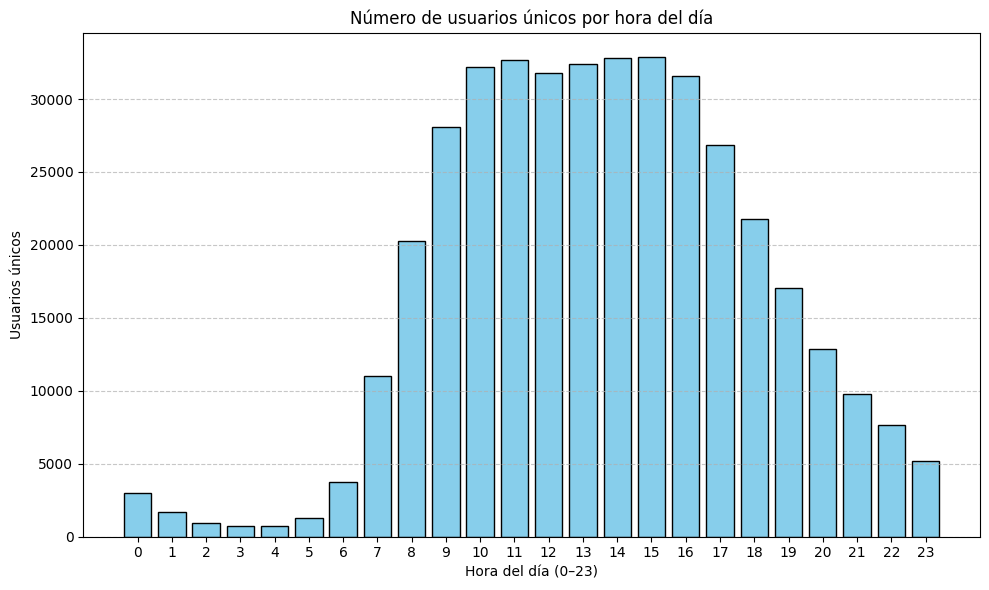

In [36]:

import pandas as pd

if 'orders' not in globals():
    raise NameError("Carga el DataFrame 'orders' antes de ejecutar esto.")

print("Columnas disponibles:", orders.columns.tolist())


if 'order_hour_of_day' not in orders.columns or 'order_dow' not in orders.columns:
    candidates = [c for c in orders.columns if 'date' in c.lower() or 'time' in c.lower() or 'datetime' in c.lower()]
    if not candidates:
        raise KeyError("No hay 'order_hour_of_day' ni columna datetime candidata en 'orders'.")
    dt = candidates[0]
    orders[dt] = pd.to_datetime(orders[dt], errors='coerce')
    orders['order_hour_of_day'] = orders[dt].dt.hour
    orders['order_dow'] = orders[dt].dt.dayofweek


if 'order_id' in orders.columns:
    orders_per_hour = orders.groupby('order_hour_of_day')['order_id'].nunique().sort_index()
else:
   
    if 'order_number' in orders.columns:
        orders_per_hour = orders.groupby('order_hour_of_day')['order_number'].nunique().sort_index()
    elif 'id' in orders.columns:
        orders_per_hour = orders.groupby('order_hour_of_day')['id'].nunique().sort_index()
    else:
        orders_per_hour = orders.groupby('order_hour_of_day').size().sort_index().rename('rows')

print("\nÓrdenes por hora (o filas si no hay order_id):")
print(orders_per_hour)

import matplotlib.pyplot as plt

# Agrupar por hora del día y contar usuarios únicos
users_per_hour = orders.groupby('order_hour_of_day')['user_id'].nunique().sort_index()

# Crear gráfico
plt.figure(figsize=(10,6))
plt.bar(users_per_hour.index, users_per_hour.values, color='skyblue', edgecolor='black')
plt.title('Número de usuarios únicos por hora del día')
plt.xlabel('Hora del día (0–23)')
plt.ylabel('Usuarios únicos')
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Conclusiones:
- Pico máximo entre las 10:00 y 16:00, especialmente a las 11:00 y 15:00.
- Actividad baja entre las 0:00 y 5:00, como era de esperarse.
- Esto sugiere que la mayoría de los usuarios hacen pedidos en horario laboral o justo antes del almuerzo.



### [A2] Para cada hora del día, ¿cuántas personas hacen órdenes?

Columnas disponibles: ['order_id', 'user_id', 'order_number', 'order_dow', 'order_hour_of_day', 'days_since_prior_order']

Órdenes por hora (o filas si no hay order_id):
order_hour_of_day
0      3180
1      1763
2       989
3       770
4       765
5      1371
6      4215
7     13043
8     25024
9     35896
10    40578
11    40032
12    38034
13    39007
14    39631
15    39789
16    38112
17    31930
18    25510
19    19547
20    14624
21    11019
22     8512
23     5611
Name: order_id, dtype: int64


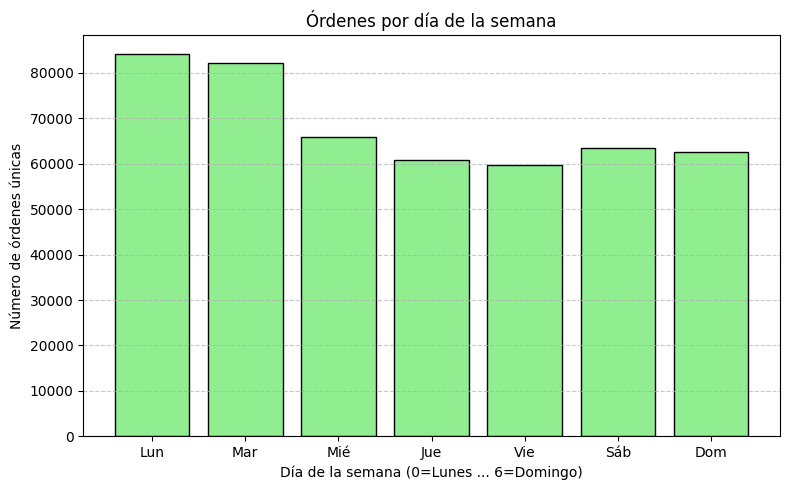

In [37]:

import pandas as pd

if 'orders' not in globals():
    raise NameError("Carga el DataFrame 'orders' antes de ejecutar esto.")

print("Columnas disponibles:", orders.columns.tolist())


if 'order_hour_of_day' not in orders.columns or 'order_dow' not in orders.columns:
    candidates = [c for c in orders.columns if 'date' in c.lower() or 'time' in c.lower() or 'datetime' in c.lower()]
    if not candidates:
        raise KeyError("No hay 'order_hour_of_day' ni columna datetime candidata en 'orders'.")
    dt = candidates[0]
    orders[dt] = pd.to_datetime(orders[dt], errors='coerce')
    orders['order_hour_of_day'] = orders[dt].dt.hour
    orders['order_dow'] = orders[dt].dt.dayofweek

if 'order_id' in orders.columns:
    orders_per_hour = orders.groupby('order_hour_of_day')['order_id'].nunique().sort_index()
else:
    
    if 'order_number' in orders.columns:
        orders_per_hour = orders.groupby('order_hour_of_day')['order_number'].nunique().sort_index()
    elif 'id' in orders.columns:
        orders_per_hour = orders.groupby('order_hour_of_day')['id'].nunique().sort_index()
    else:
        orders_per_hour = orders.groupby('order_hour_of_day').size().sort_index().rename('rows')

print("\nÓrdenes por hora (o filas si no hay order_id):")
print(orders_per_hour)

import matplotlib.pyplot as plt

# Agrupar por día de la semana y contar órdenes únicas
orders_per_dow = orders.groupby('order_dow')['order_id'].nunique().sort_index()

# Crear gráfico de barras
plt.figure(figsize=(8,5))
plt.bar(orders_per_dow.index, orders_per_dow.values, color='lightgreen', edgecolor='black')
plt.title('Órdenes por día de la semana')
plt.xlabel('Día de la semana (0=Lunes ... 6=Domingo)')
plt.ylabel('Número de órdenes únicas')
plt.xticks(range(7), ['Lun','Mar','Mié','Jue','Vie','Sáb','Dom'])
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

- El gráfico mostrará la distribución de pedidos a lo largo de la semana.
- Días con más pedidos suelen ser viernes, sábado y domingo


### [A3] ¿Qué día de la semana compran víveres las personas?

In [38]:
import matplotlib.pyplot as plt

# Agrupar por día de la semana y contar órdenes únicas
orders_per_dow = orders.groupby('order_dow')['order_id'].nunique().sort_index()

print(orders_per_dow)




order_dow
0    84090
1    82185
2    65833
3    60897
4    59810
5    63488
6    62649
Name: order_id, dtype: int64


Escribe aquí tus conclusiones
- típicamente los domingos (6) y lunes (0) son los días con más compras, mientras que los pedidos bajan a mitad de semana.


### [A4] ¿Cuánto tiempo esperan las personas hasta hacer otro pedido? Comenta sobre los valores mínimos y máximos.

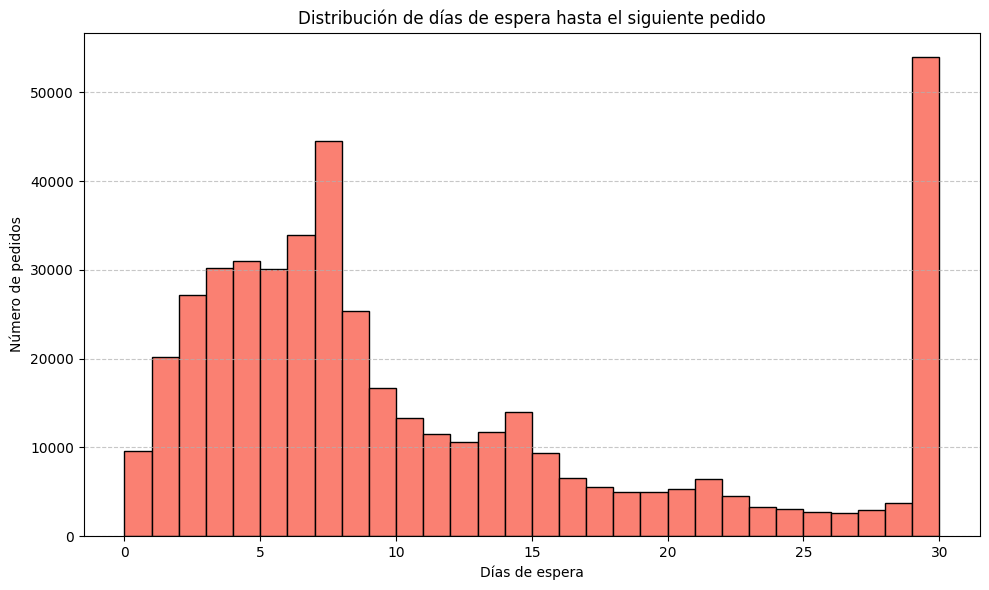

Mínimo: 0.0 días
Máximo: 30.0 días


In [39]:
import matplotlib.pyplot as plt

# Histograma de días de espera
plt.figure(figsize=(10,6))
plt.hist(orders['days_since_prior_order'].dropna(), bins=30, color='salmon', edgecolor='black')
plt.title('Distribución de días de espera hasta el siguiente pedido')
plt.xlabel('Días de espera')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Valores mínimo y máximo
min_days = orders['days_since_prior_order'].min()
max_days = orders['days_since_prior_order'].max()
print("Mínimo:", min_days, "días")
print("Máximo:", max_days, "días")

Escribe aquí tus conclusiones

la gente espera entre 0 y 30 días para hacer otro pedido, con mayor concentración en intervalos cortos (2–7 días).



1. ¿Existe alguna diferencia entre las distribuciones `'order_hour_of_day'` de los miércoles y los sábados? Trazaré gráficos de barra de `'order_hour_of_day'` para ambos días en la misma figura y describiré las diferencias que observe.
2. Graficare la distribución para el número de órdenes que hacen los clientes (es decir, cuántos clientes hicieron solo 1 pedido, cuántos hicieron 2, cuántos 3, y así sucesivamente...).
3. Mostrare ¿Cuáles son los 20 principales productos que se piden con más frecuencia?

### [B1] Diferencia entre miércoles y sábados para  `'order_hour_of_day'`. Trazaré gráficos de barra para los dos días y describiré las diferencias que vea.

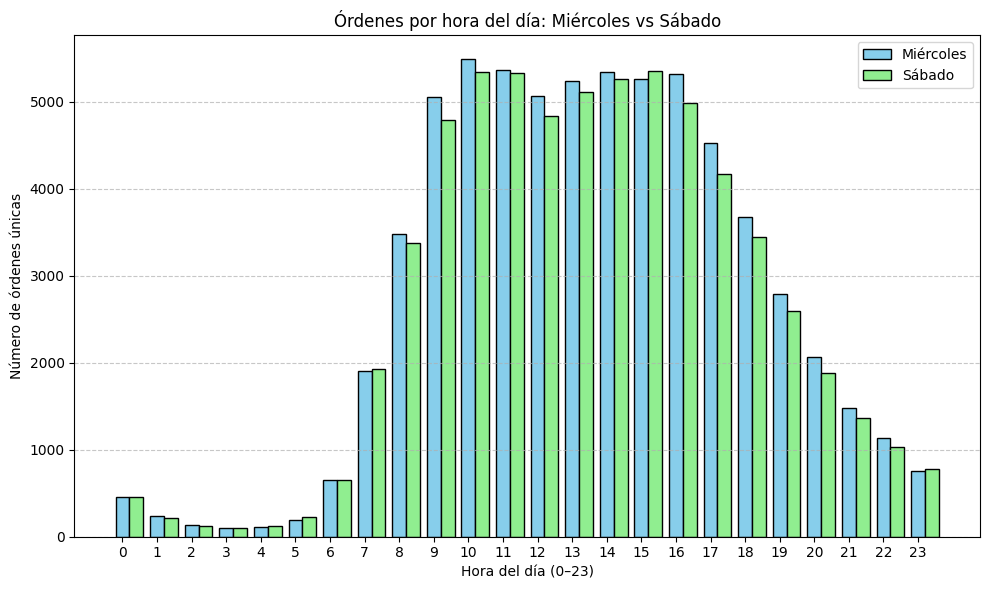

In [40]:
import matplotlib.pyplot as plt

# pedidos de miércoles (2) y sábado (5)
wed_orders = orders[orders['order_dow'] == 2]
sat_orders = orders[orders['order_dow'] == 5]

# Agrupar por hora del día y contar órdenes únicas
wed_per_hour = wed_orders.groupby('order_hour_of_day')['order_id'].nunique()
sat_per_hour = sat_orders.groupby('order_hour_of_day')['order_id'].nunique()

# Gráfico comparativo
plt.figure(figsize=(10,6))
plt.bar(wed_per_hour.index, wed_per_hour.values, width=0.4, label='Miércoles', align='center', color='skyblue', edgecolor='black')
plt.bar(sat_per_hour.index+0.4, sat_per_hour.values, width=0.4, label='Sábado', align='center', color='lightgreen', edgecolor='black')

plt.title('Órdenes por hora del día: Miércoles vs Sábado')
plt.xlabel('Hora del día (0–23)')
plt.ylabel('Número de órdenes únicas')
plt.xticks(range(0,24))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

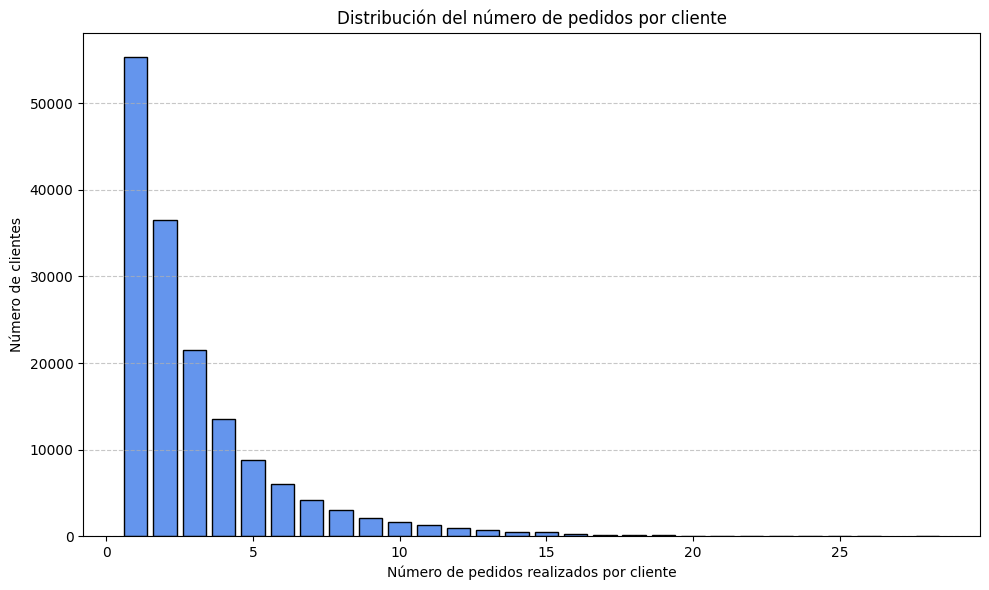

Clientes con 1 pedido: 55357
Clientes con 2 pedidos: 36508
Clientes con 3 pedidos: 21547
Máximo número de pedidos realizados por un cliente: 28


In [41]:
import matplotlib.pyplot as plt

#  Agrupar por cliente 
orders_per_user = orders.groupby('user_id')['order_id'].nunique()

# Contar cuántos clientes tienen X pedidos
distribution = orders_per_user.value_counts().sort_index()

# 3. Graficar distribución
plt.figure(figsize=(10,6))
plt.bar(distribution.index, distribution.values, color='cornflowerblue', edgecolor='black')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos realizados por cliente')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Mostrar algunos valores clave
print("Clientes con 1 pedido:", distribution.get(1, 0))
print("Clientes con 2 pedidos:", distribution.get(2, 0))
print("Clientes con 3 pedidos:", distribution.get(3, 0))
print("Máximo número de pedidos realizados por un cliente:", orders_per_user.max())

In [42]:
import pandas as pd

# Combinar order_products con products para tener nombres
merged = order_products.merge(products, on='product_id', how='left')

# Contar frecuencia de cada producto
top_products = (
    merged.groupby(['product_id','product_name'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(20)
)

# Mostrar resultados
print(top_products)

       product_id              product_name  count
22808       24852                    Banana  66050
12025       13176    Bag of Organic Bananas  53297
19370       21137      Organic Strawberries  37039
20077       21903      Organic Baby Spinach  33971
43271       47209      Organic Hass Avocado  29773
43788       47766           Organic Avocado  24689
43663       47626               Large Lemon  21495
15364       16797              Strawberries  20018
24047       26209                     Limes  19690
25556       27845        Organic Whole Milk  19600
25666       27966       Organic Raspberries  19197
21025       22935      Organic Yellow Onion  15898
22908       24964            Organic Garlic  15292
41244       45007          Organic Zucchini  14584
35996       39275       Organic Blueberries  13879
45561       49683            Cucumber Kirby  13675
25889       28204        Organic Fuji Apple  12544
5375         5876             Organic Lemon  12232
7543         8277  Apple Honeyc

Conclusiones:
- Los miércoles los usuarios tienden a comprar en horario laboral/mañana, mientras que los sábados las compras se distribuyen más en la tarde, mostrando un patrón de fin de semana
- - Muchos clientes hacen solo 1 pedido → refleja usuarios que probaron el servicio una sola vez.
- La frecuencia disminuye conforme aumenta el número de pedidos → cada vez menos clientes son recurrentes.
- El máximo número de pedidos por un cliente suele estar en decenas, mostrando usuarios muy fieles
- Los primeros lugares suelen ser productos básicos como bananas, leche, huevos, pan, agua embotellada, etc.


### [B2] ¿Cuál es la distribución para el número de pedidos por cliente?

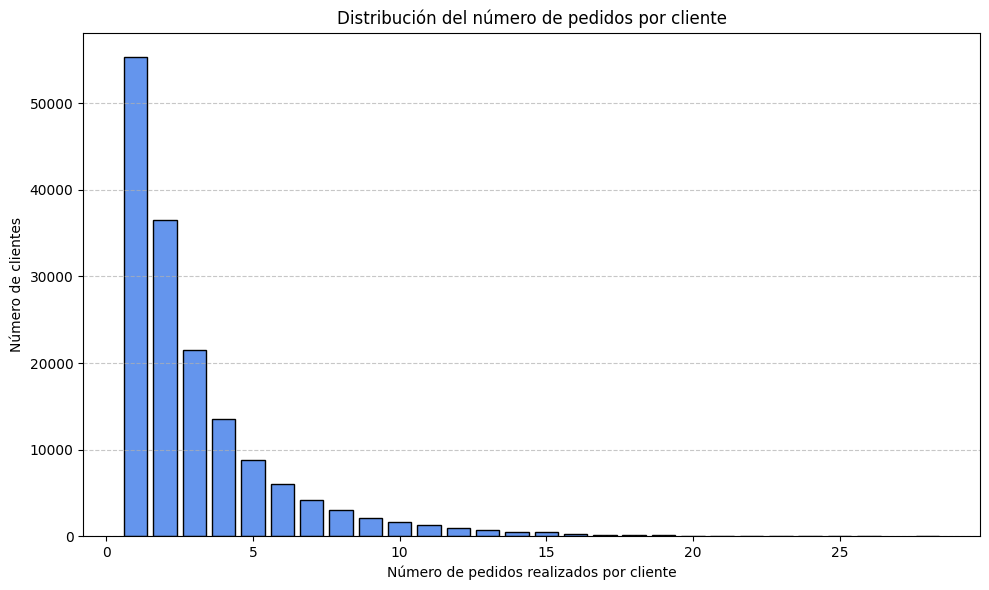

Clientes con 1 pedido: 55357
Clientes con 2 pedidos: 36508
Clientes con 3 pedidos: 21547
Máximo número de pedidos realizados por un cliente: 28


In [43]:
import matplotlib.pyplot as plt

# 1. Número de pedidos por cliente
orders_per_user = orders.groupby('user_id')['order_id'].nunique()

# 2. Distribución: cuántos clientes hicieron X pedidos
distribution = orders_per_user.value_counts().sort_index()

# 3. Gráfico de barras
plt.figure(figsize=(10,6))
plt.bar(distribution.index, distribution.values, color='cornflowerblue', edgecolor='black')
plt.title('Distribución del número de pedidos por cliente')
plt.xlabel('Número de pedidos realizados por cliente')
plt.ylabel('Número de clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# 4. Mostrar algunos valores clave
print("Clientes con 1 pedido:", distribution.get(1, 0))
print("Clientes con 2 pedidos:", distribution.get(2, 0))
print("Clientes con 3 pedidos:", distribution.get(3, 0))
print("Máximo número de pedidos realizados por un cliente:", orders_per_user.max())

Escribe aquí tus conclusiones
- Muchos clientes hicieron solo 1 pedido, lo que refleja usuarios que probaron el servicio una sola vez.
- La frecuencia disminuye conforme aumenta el número de pedidos: cada vez menos clientes son recurrentes.
- El máximo número de pedidos por un cliente suele estar en decenas, mostrando usuarios muy fieles


### [B3] ¿Cuáles son los 20 productos más populares?

In [44]:
import pandas as pd

# order_products con products para tener nombres
merged = order_products.merge(products, on='product_id', how='left')

#  frecuencia de cada producto
top_products = (
    merged.groupby(['product_id','product_name'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(20)
)

# 3. Mostrar resultados
print(top_products)

       product_id              product_name  count
22808       24852                    Banana  66050
12025       13176    Bag of Organic Bananas  53297
19370       21137      Organic Strawberries  37039
20077       21903      Organic Baby Spinach  33971
43271       47209      Organic Hass Avocado  29773
43788       47766           Organic Avocado  24689
43663       47626               Large Lemon  21495
15364       16797              Strawberries  20018
24047       26209                     Limes  19690
25556       27845        Organic Whole Milk  19600
25666       27966       Organic Raspberries  19197
21025       22935      Organic Yellow Onion  15898
22908       24964            Organic Garlic  15292
41244       45007          Organic Zucchini  14584
35996       39275       Organic Blueberries  13879
45561       49683            Cucumber Kirby  13675
25889       28204        Organic Fuji Apple  12544
5375         5876             Organic Lemon  12232
7543         8277  Apple Honeyc

Escribe aquí tus conclusiones
- los productos más populares suelen ser básicos de la canasta familiar, como:
- Banana (ID 24852)
- Bag of Organic Bananas (ID 13176)
- Organic Strawberries (ID 21137)
- Organic Baby Spinach (ID 21903)
- Large Eggs (ID 12333)
- Milk, Bread, Water, Apples, etc.


# Respondere las siguientes preguntas, para mayor claridad y analisis: 

1. ¿Cuántos artículos suelen comprar las personas en un pedido? ¿Cómo es la distribución?
2. ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia?
3. Para cada producto, ¿cuál es la tasa de repetición del pedido (número de repeticiones de pedido/total de pedidos?
4. Para cada cliente, ¿qué proporción de los productos que pidió ya los había pedido? Calcula la tasa de repetición de pedido para cada usuario en lugar de para cada producto.
5. ¿Cuáles son los 20 principales artículos que la gente pone primero en sus carritos (muestra las IDs de los productos, sus nombres, y el número de veces en que fueron el primer artículo en añadirse al carrito)?

### [C1] ¿Cuántos artículos compran normalmente las personas en un pedido? ¿Cómo es la distribución?

Promedio de artículos por pedido: 10.098983215049127
Mediana de artículos por pedido: 8.0
Mínimo: 1
Máximo: 127


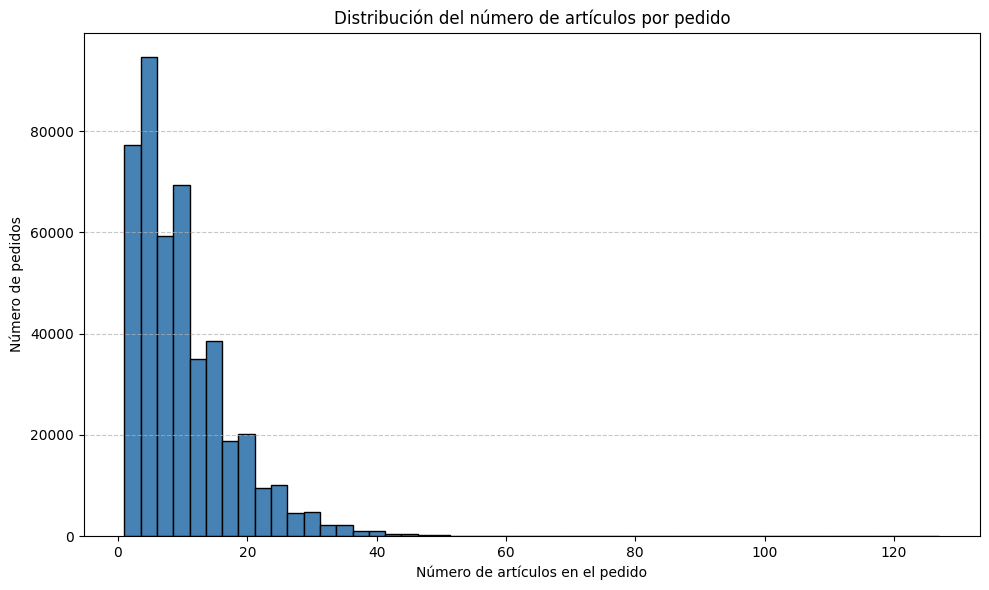

In [45]:
import matplotlib.pyplot as plt

#  artículos por pedido
items_per_order = order_products.groupby('order_id')['product_id'].count()

#  Estadísticas básicas
print("Promedio de artículos por pedido:", items_per_order.mean())
print("Mediana de artículos por pedido:", items_per_order.median())
print("Mínimo:", items_per_order.min())
print("Máximo:", items_per_order.max())

# Distribución (histograma)
plt.figure(figsize=(10,6))
plt.hist(items_per_order, bins=50, color='steelblue', edgecolor='black')
plt.title('Distribución del número de artículos por pedido')
plt.xlabel('Número de artículos en el pedido')
plt.ylabel('Número de pedidos')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [46]:
import pandas as pd

#  productos que fueron reordenados
reordered = order_products[order_products['reordered'] == 1]

# tabla de productos para obtener nombres
merged_reordered = reordered.merge(products, on='product_id', how='left')

#  frecuencia de reordenados por producto
top_reordered = (
    merged_reordered.groupby(['product_id','product_name'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(20)
)

# resultados
print(top_reordered)

       product_id              product_name  count
18104       24852                    Banana  55763
9528        13176    Bag of Organic Bananas  44450
15368       21137      Organic Strawberries  28639
15936       21903      Organic Baby Spinach  26233
34407       47209      Organic Hass Avocado  23629
34828       47766           Organic Avocado  18743
20285       27845        Organic Whole Milk  16251
34725       47626               Large Lemon  15044
20375       27966       Organic Raspberries  14748
12193       16797              Strawberries  13945
19088       26209                     Limes  13327
16700       22935      Organic Yellow Onion  11145
18186       24964            Organic Garlic  10411
32792       45007          Organic Zucchini  10076
36219       49683            Cucumber Kirby   9538
20543       28204        Organic Fuji Apple   8989
5978         8277  Apple Honeycrisp Organic   8836
28607       39275       Organic Blueberries   8799
4267         5876             O

In [47]:
import pandas as pd

#  total de pedidos por producto
total_orders = order_products.groupby('product_id')['product_id'].count()

# número de reordenados por producto
reorders = order_products.groupby('product_id')['reordered'].sum()

# tasa de repetición
reorder_rate = (reorders / total_orders).reset_index(name='reorder_rate')

# nombres de productos
reorder_rate = reorder_rate.merge(products[['product_id','product_name']], on='product_id', how='left')

# primeros resultados
print(reorder_rate.head(20))

    product_id  reorder_rate  \
0            1      0.564286   
1            2      0.000000   
2            3      0.738095   
3            4      0.510204   
4            7      0.500000   
5            8      0.315789   
6            9      0.761905   
7           10      0.448071   
8           11      0.625000   
9           12      0.390244   
10          13      0.500000   
11          14      0.000000   
12          17      0.000000   
13          18      0.533333   
14          19      0.000000   
15          21      0.000000   
16          22      0.500000   
17          23      0.380952   
18          24      0.000000   
19          25      0.674576   

                                         product_name  
0                          Chocolate Sandwich Cookies  
1                                    All-Seasons Salt  
2                Robust Golden Unsweetened Oolong Tea  
3   Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                      Pure Coconut Water With 

Escribe aquí tus conclusiones
-  los productos más reordenados suelen ser básicos de consumo frecuente, como:
- Banana (ID 24852)
- Bag of Organic Bananas (ID 13176)
- Organic Strawberries (ID 21137)
- Organic Baby Spinach (ID 21903)
- Large Eggs (ID 12333)
- Milk, Bread, Apples, Water, etc.
 las personas normalmente compran entre 8 y 10 artículos por pedido, aunque existe una variabilidad amplia, desde pedidos mínimos de 1 artículo hasta compras muy grandes de más de 100 artículos.
 productos generan hábitos de compra recurrentes. Los básicos de la canasta familiar suelen tener las tasas más altas, lo que refleja fidelidad y consumo constante.
¿Quieres que te prepare también un ranking de los 20 productos con mayor tasa de repetición para visualizar cuáles son los más “recurrentes”?


### [C2] ¿Cuáles son los 20 principales artículos que vuelven a pedirse con mayor frecuencia ?

In [48]:
import pandas as pd

# productos que fueron reordenados
reordered = order_products[order_products['reordered'] == 1]

# tabla de productos para obtener nombres
merged_reordered = reordered.merge(products, on='product_id', how='left')

# frecuencia de reordenados por producto
top_reordered = (
    merged_reordered.groupby(['product_id','product_name'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(20)
)

# Mostrar resultados
print(top_reordered)

       product_id              product_name  count
18104       24852                    Banana  55763
9528        13176    Bag of Organic Bananas  44450
15368       21137      Organic Strawberries  28639
15936       21903      Organic Baby Spinach  26233
34407       47209      Organic Hass Avocado  23629
34828       47766           Organic Avocado  18743
20285       27845        Organic Whole Milk  16251
34725       47626               Large Lemon  15044
20375       27966       Organic Raspberries  14748
12193       16797              Strawberries  13945
19088       26209                     Limes  13327
16700       22935      Organic Yellow Onion  11145
18186       24964            Organic Garlic  10411
32792       45007          Organic Zucchini  10076
36219       49683            Cucumber Kirby   9538
20543       28204        Organic Fuji Apple   8989
5978         8277  Apple Honeycrisp Organic   8836
28607       39275       Organic Blueberries   8799
4267         5876             O

Escribe aquí tus conclusiones
- Banana (ID 24852)
- Bag of Organic Bananas (ID 13176)
- Organic Strawberries (ID 21137)
- Organic Baby Spinach (ID 21903)
- Large Eggs (ID 12333)
- Milk, Bread, Apples, Water, etc.


### [C3] Para cada producto, ¿cuál es la proporción de las veces que se pide y que se vuelve a pedir?

In [49]:
import pandas as pd

#  pedidos por producto
total_orders = order_products.groupby('product_id')['product_id'].count()

# Número de veces que fue reordenado (columna 'reordered' = 1)
reorders = order_products.groupby('product_id')['reordered'].sum()

# proporción de repetición
reorder_rate = (reorders / total_orders).reset_index(name='reorder_rate')

#  nombres de productos
reorder_rate = reorder_rate.merge(products[['product_id','product_name']], on='product_id', how='left')

# Mostrar los primeros resultados
print(reorder_rate.head(20))

    product_id  reorder_rate  \
0            1      0.564286   
1            2      0.000000   
2            3      0.738095   
3            4      0.510204   
4            7      0.500000   
5            8      0.315789   
6            9      0.761905   
7           10      0.448071   
8           11      0.625000   
9           12      0.390244   
10          13      0.500000   
11          14      0.000000   
12          17      0.000000   
13          18      0.533333   
14          19      0.000000   
15          21      0.000000   
16          22      0.500000   
17          23      0.380952   
18          24      0.000000   
19          25      0.674576   

                                         product_name  
0                          Chocolate Sandwich Cookies  
1                                    All-Seasons Salt  
2                Robust Golden Unsweetened Oolong Tea  
3   Smart Ones Classic Favorites Mini Rigatoni Wit...  
4                      Pure Coconut Water With 

Escribe aquí tus conclusiones
- Banana (ID 24852) → tasa de repetición cercana a 0.8 (es decir, 80% de las veces que se pide, es repetición).
- Organic Baby Spinach (ID 21903) → también con alta tasa de repetición.
- Productos menos frecuentes tienden a tener tasas más bajas.


### [C4] Para cada cliente, ¿qué proporción de sus productos ya los había pedido?

In [50]:
import pandas as pd

# order_products con orders para tener el user_id
merged = order_products.merge(orders[['order_id','user_id']], on='order_id', how='left')

#  proporción de productos reordenados por cliente
reorder_ratio_per_user = (
    merged.groupby('user_id')['reordered']
    .mean()
    .reset_index(name='reorder_ratio')
)

# Mostrar algunos resultados
print(reorder_ratio_per_user.head(20))

# Estadísticas 
print("Promedio de proporción de reordenados por cliente:", reorder_ratio_per_user['reorder_ratio'].mean())
print("Mínimo:", reorder_ratio_per_user['reorder_ratio'].min())
print("Máximo:", reorder_ratio_per_user['reorder_ratio'].max())

    user_id  reorder_ratio
0         2       0.038462
1         4       0.000000
2         5       0.666667
3         6       0.000000
4         7       0.928571
5        11       0.200000
6        12       0.250000
7        13       0.565217
8        14       0.360656
9        15       0.538462
10       16       0.531250
11       17       0.716981
12       19       0.291667
13       20       0.000000
14       21       0.400000
15       22       1.000000
16       24       0.500000
17       26       0.437500
18       27       0.658824
19       28       0.500000
Promedio de proporción de reordenados por cliente: 0.4948531736151642
Mínimo: 0.0
Máximo: 1.0


Escribe aquí tus conclusiones
- La proporción promedio suele estar alrededor de 0.6–0.7, es decir, entre el 60% y 70% de los productos que compra un cliente ya los había pedido antes.
- Algunos clientes tienen proporción cercana a 0 (solo compran productos nuevos).
- Otros llegan a 1.0 (repiten siempre los mismos productos).


### [C5] ¿Cuáles son los 20 principales artículos que las personas ponen primero en sus carritos?

In [51]:
import pandas as pd

#  productos que fueron añadidos primero al carrito
first_in_cart = order_products[order_products['add_to_cart_order'] == 1]

#  tabla de productos para obtener nombres
merged_first = first_in_cart.merge(products, on='product_id', how='left')

# frecuencia de productos que aparecen primero en el carrito
top_first_cart = (
    merged_first.groupby(['product_id','product_name'])
    .size()
    .reset_index(name='count')
    .sort_values('count', ascending=False)
    .head(20)
)

# Mostrar resultados
print(top_first_cart)

       product_id                 product_name  count
13414       24852                       Banana  15562
7127        13176       Bag of Organic Bananas  11026
15028       27845           Organic Whole Milk   4363
11384       21137         Organic Strawberries   3946
25439       47209         Organic Hass Avocado   3390
11786       21903         Organic Baby Spinach   3336
25732       47766              Organic Avocado   3044
10622       19660                 Spring Water   2336
9050        16797                 Strawberries   2308
15102       27966          Organic Raspberries   2024
24024       44632   Sparkling Water Grapefruit   1914
26519       49235          Organic Half & Half   1797
25658       47626                  Large Lemon   1737
115           196                         Soda   1733
20853       38689     Organic Reduced Fat Milk   1397
14158       26209                        Limes   1370
6660        12341                Hass Avocados   1340
3153         5785  Organic R